# Loan Default Prediction - Part 13 - Support Vector Machine Kernels

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 13 of the project: Support Vector Machine Kernels.

In this part, I will be trying different kernels of Support Vector Machines.

I will first load the normalized data and downsample it.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils

In [2]:
# Load the training data (imputed but not normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


In [3]:
# Downsample the DataFrame

seed = 0 # Provide the seed so the random sampling will be the same
downsample_frac = 0.05
df_downsampled = df.sample(frac=downsample_frac, random_state=seed)
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 43476 to 60051
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 72.0 MB


In [4]:
# Separate data and label, training and validation sets

X = df_downsampled.drop(['loss'], axis=1) # Features
y = (df_downsampled.loc[:,'loss'] > 0) # Labels
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

In [5]:
# Define class weights

class_weight = {0: 1., 1: 10.}

## Linear Kernel

In the previous part, I experimented with the RBF kernel. Now, I will switch to a linear kernel.

In [6]:
from sklearn import svm

Time elapsed (Training): 118.2140 s
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.945485
ROCAUC Score (Training): 0.886067
PRAUC Score (Training): 0.593218
Accuracy (Validation): 0.854976
ROCAUC Score (Validation): 0.586617
PRAUC Score (Validation): 0.092304
Time elapsed (Evaluation): 15.2943 s


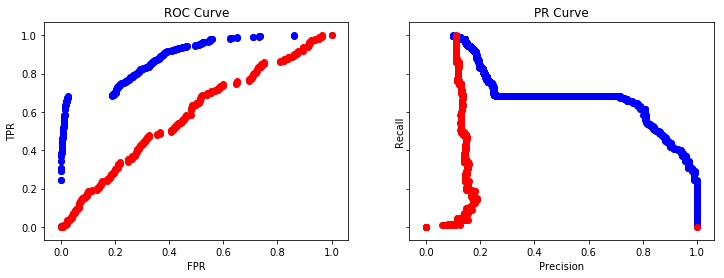

In [7]:
# Train and evaluate the model

clf = svm.SVC(probability=True, kernel='linear') # Set probability=True to enable the predict_proba() API
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

## Polynomial Kernel

Next, I will try the polynomial kernel with degree 2.

Time elapsed (Training): 118.4905 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.855653
ROCAUC Score (Training): 0.871581
PRAUC Score (Training): 0.457801
Accuracy (Validation): 0.759242
ROCAUC Score (Validation): 0.603423
PRAUC Score (Validation): 0.043824
Time elapsed (Evaluation): 53.8896 s


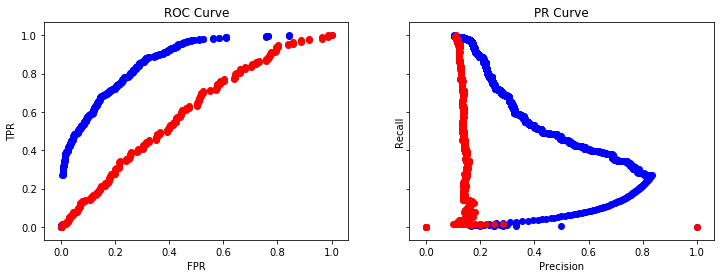

In [8]:
# Train and evaluate the model

clf = svm.SVC(probability=True, class_weight=class_weight, kernel='poly', degree=2) # Set probability=True to enable the predict_proba() API
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

Then, try different __gamma__s.

In [9]:
# Define a set of values to try

ks = [1e-5, 2e-5, 5e-5, 1e-4, 2e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1]

----- gamma = 0.000010 -----
Time elapsed (Training): 135.6834 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=1e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.343667
PRAUC Score (Training): 0.482892
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.420204
PRAUC Score (Validation): 0.469429
Time elapsed (Evaluation): 60.6266 s


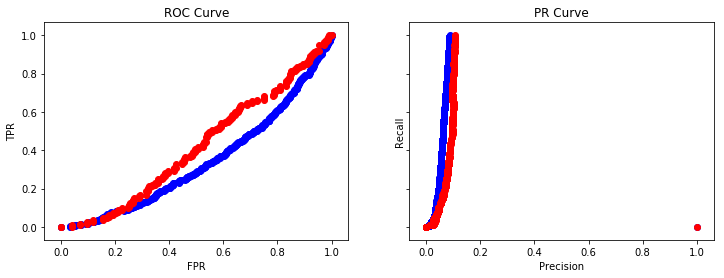

----- gamma = 0.000020 -----
Time elapsed (Training): 133.7669 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=2e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.663099
PRAUC Score (Training): 0.065458
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.584099
PRAUC Score (Validation): 0.037092
Time elapsed (Evaluation): 60.4991 s


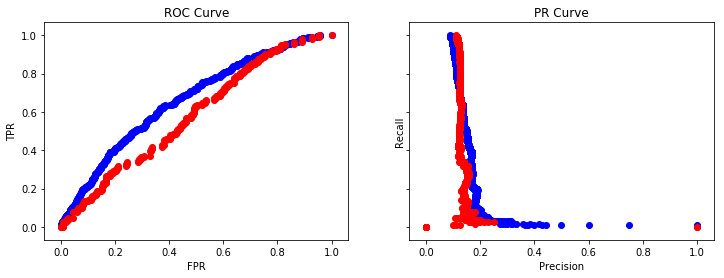

----- gamma = 0.000050 -----
Time elapsed (Training): 133.9740 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=5e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.910879
ROCAUC Score (Training): 0.664778
PRAUC Score (Training): 0.065801
Accuracy (Validation): 0.886256
ROCAUC Score (Validation): 0.585724
PRAUC Score (Validation): 0.036274
Time elapsed (Evaluation): 60.4616 s


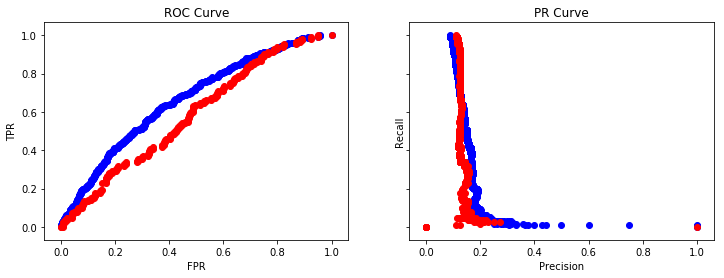

----- gamma = 0.000100 -----
Time elapsed (Training): 132.9413 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.0001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.901872
ROCAUC Score (Training): 0.687105
PRAUC Score (Training): 0.083990
Accuracy (Validation): 0.877725
ROCAUC Score (Validation): 0.597148
PRAUC Score (Validation): 0.098165
Time elapsed (Evaluation): 60.4741 s


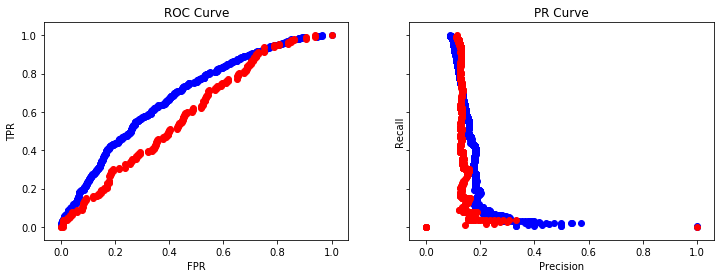

----- gamma = 0.000200 -----
Time elapsed (Training): 130.3636 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.0002, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.872245
ROCAUC Score (Training): 0.727419
PRAUC Score (Training): 0.125304
Accuracy (Validation): 0.838863
ROCAUC Score (Validation): 0.604560
PRAUC Score (Validation): 0.052931
Time elapsed (Evaluation): 58.3870 s


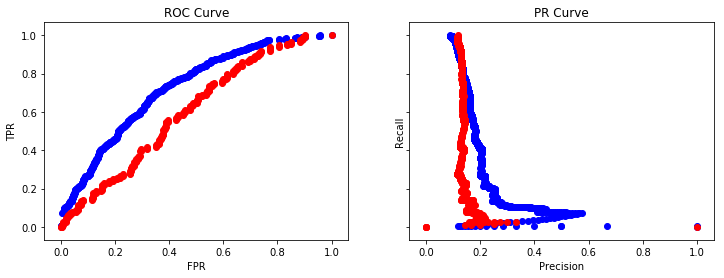

----- gamma = 0.000500 -----
Time elapsed (Training): 121.7175 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.0005, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.852098
ROCAUC Score (Training): 0.851847
PRAUC Score (Training): 0.420761
Accuracy (Validation): 0.760190
ROCAUC Score (Validation): 0.605913
PRAUC Score (Validation): 0.092523
Time elapsed (Evaluation): 54.9747 s


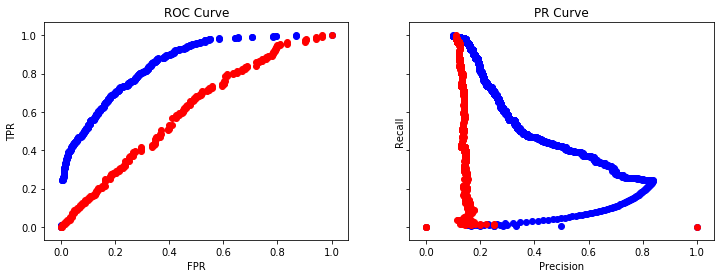

----- gamma = 0.001000 -----
Time elapsed (Training): 108.8264 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.889547
ROCAUC Score (Training): 0.961742
PRAUC Score (Training): 0.603455
Accuracy (Validation): 0.766825
ROCAUC Score (Validation): 0.591746
PRAUC Score (Validation): 0.052146
Time elapsed (Evaluation): 49.0287 s


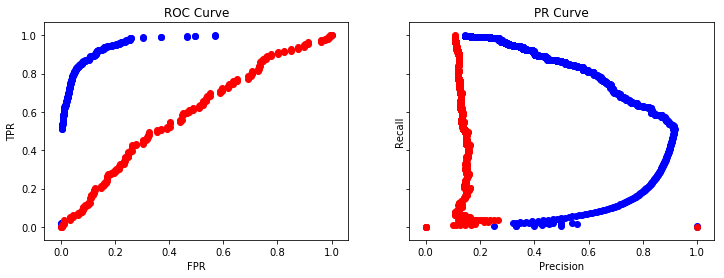

----- gamma = 0.005000 -----
Time elapsed (Training): 66.3248 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.005, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.999763
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.847393
ROCAUC Score (Validation): 0.553144
PRAUC Score (Validation): 0.045080
Time elapsed (Evaluation): 28.9525 s


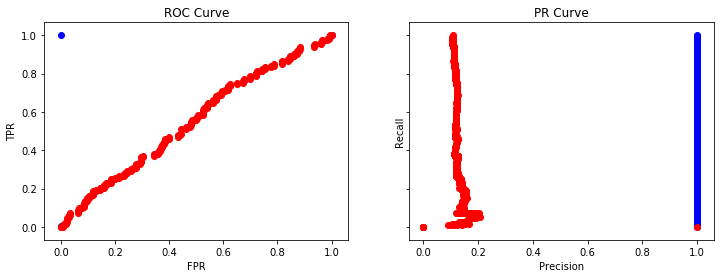

----- gamma = 0.010000 -----
Time elapsed (Training): 64.6586 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.01, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.849289
ROCAUC Score (Validation): 0.556545
PRAUC Score (Validation): 0.051483
Time elapsed (Evaluation): 27.8896 s


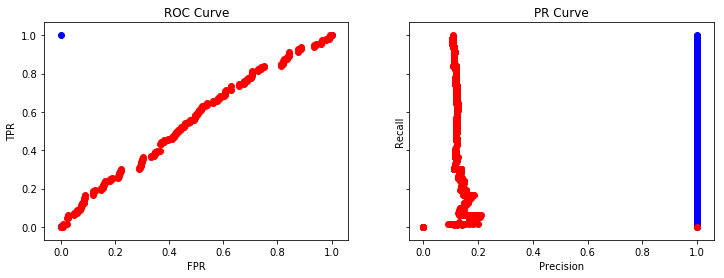

----- gamma = 0.050000 -----
Time elapsed (Training): 65.6731 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 0.000000
PRAUC Score (Training): 0.498681
Accuracy (Validation): 0.849289
ROCAUC Score (Validation): 0.443474
PRAUC Score (Validation): 0.026701
Time elapsed (Evaluation): 29.2461 s


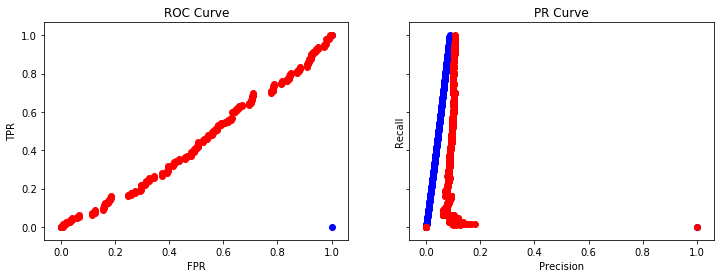

----- gamma = 0.100000 -----
Time elapsed (Training): 66.5417 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.849289
ROCAUC Score (Validation): 0.556526
PRAUC Score (Validation): 0.051491
Time elapsed (Evaluation): 28.0935 s


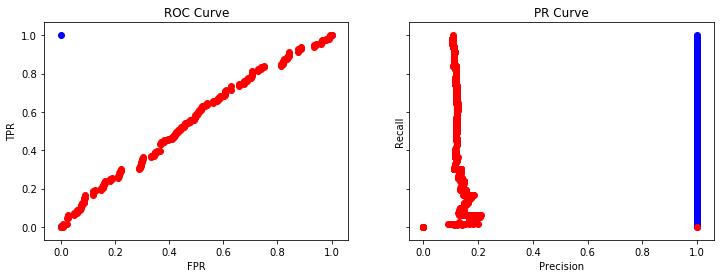

In [10]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- gamma = %f -----' % k)
    clf = svm.SVC(probability=True, class_weight=class_weight, kernel='poly', degree=2, gamma=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

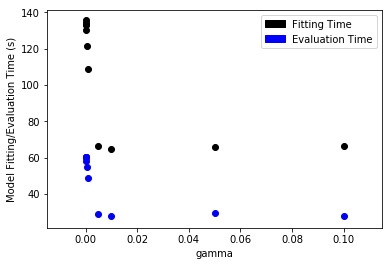

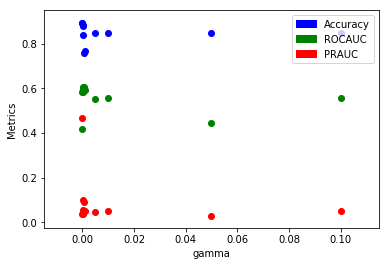

    0_gamma  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0   0.00001    0.891943  0.420204  0.469429  135.683406    60.626555
1   0.00002    0.891943  0.584099  0.037092  133.766923    60.499079
2   0.00005    0.886256  0.585724  0.036274  133.973975    60.461637
3   0.00010    0.877725  0.597148  0.098165  132.941258    60.474147
4   0.00020    0.838863  0.604560  0.052931  130.363642    58.386998
5   0.00050    0.760190  0.605913  0.092523  121.717510    54.974653
6   0.00100    0.766825  0.591746  0.052146  108.826367    49.028742
7   0.00500    0.847393  0.553144  0.045080   66.324817    28.952534
8   0.01000    0.849289  0.556545  0.051483   64.658556    27.889580
9   0.05000    0.849289  0.443474  0.026701   65.673076    29.246081
10  0.10000    0.849289  0.556526  0.051491   66.541710    28.093534


         0_gamma  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  11.000000   11.000000  11.000000  11.000000   11.000000    11.000000
mean    0.015171  

In [11]:
utils.plot_metrics(ks, 'gamma', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The best ROCAUC obtained is 0.606, better than linear but not better than RBF.

Then, try polynomial with degree 3 (default).

----- gamma = 0.000010 -----
Time elapsed (Training): 131.8134 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.680233
PRAUC Score (Training): 0.070453
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.604832
PRAUC Score (Validation): 0.065479
Time elapsed (Evaluation): 61.6092 s


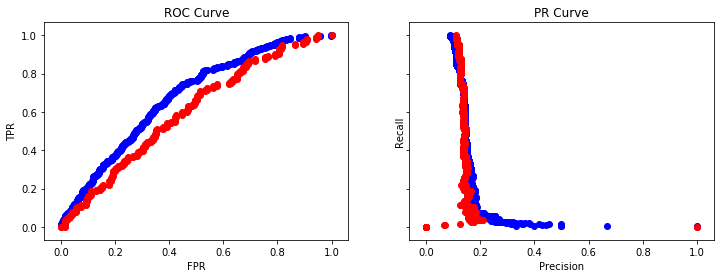

----- gamma = 0.000020 -----
Time elapsed (Training): 133.7971 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.687304
PRAUC Score (Training): 0.077016
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.605133
PRAUC Score (Validation): 0.052081
Time elapsed (Evaluation): 59.4310 s


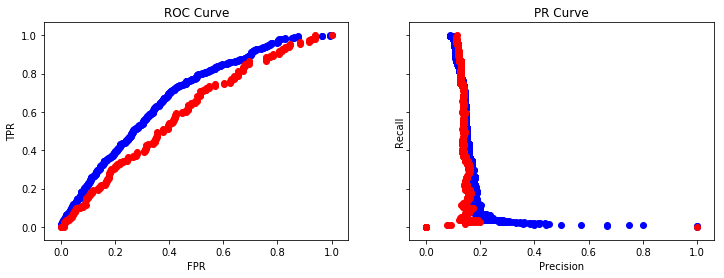

----- gamma = 0.000050 -----
Time elapsed (Training): 133.1629 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.689649
PRAUC Score (Training): 0.078781
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.605960
PRAUC Score (Validation): 0.048707
Time elapsed (Evaluation): 60.4847 s


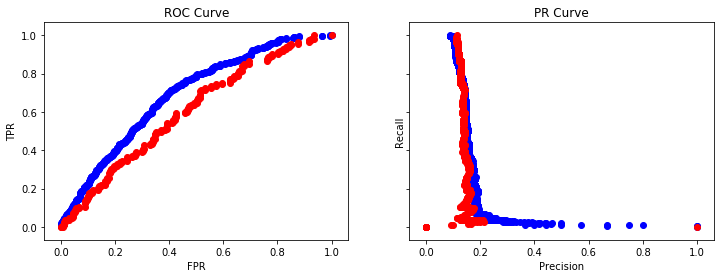

----- gamma = 0.000100 -----
Time elapsed (Training): 135.0136 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.911116
ROCAUC Score (Training): 0.695076
PRAUC Score (Training): 0.082242
Accuracy (Validation): 0.886256
ROCAUC Score (Validation): 0.609661
PRAUC Score (Validation): 0.045328
Time elapsed (Evaluation): 61.1873 s


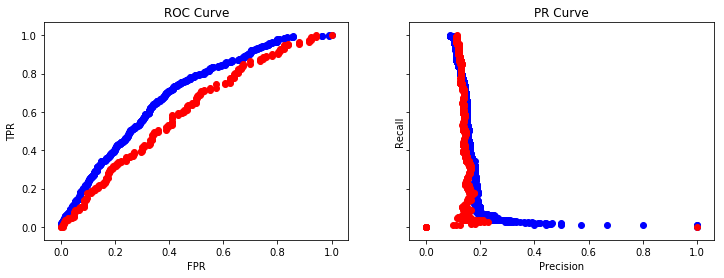

----- gamma = 0.000200 -----
Time elapsed (Training): 133.3083 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0002, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.901635
ROCAUC Score (Training): 0.717978
PRAUC Score (Training): 0.114505
Accuracy (Validation): 0.876777
ROCAUC Score (Validation): 0.615270
PRAUC Score (Validation): 0.105769
Time elapsed (Evaluation): 59.1705 s


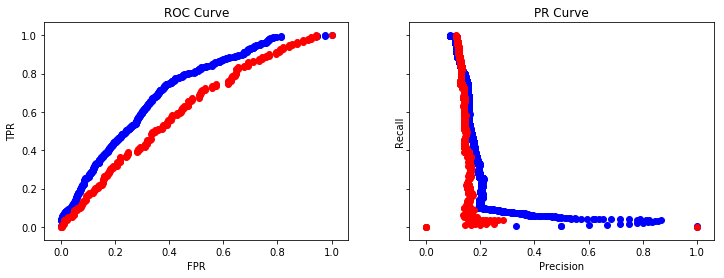

----- gamma = 0.000500 -----
Time elapsed (Training): 126.2181 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.905902
ROCAUC Score (Training): 0.833758
PRAUC Score (Training): 0.360575
Accuracy (Validation): 0.843602
ROCAUC Score (Validation): 0.622720
PRAUC Score (Validation): 0.054080
Time elapsed (Evaluation): 56.8281 s


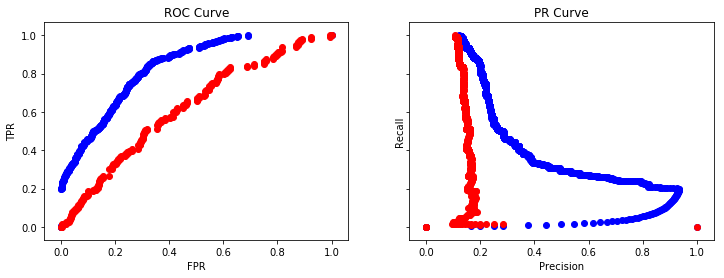

----- gamma = 0.001000 -----
Time elapsed (Training): 111.2789 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.949040
ROCAUC Score (Training): 0.967461
PRAUC Score (Training): 0.626503
Accuracy (Validation): 0.837915
ROCAUC Score (Validation): 0.611756
PRAUC Score (Validation): 0.078144
Time elapsed (Evaluation): 49.1902 s


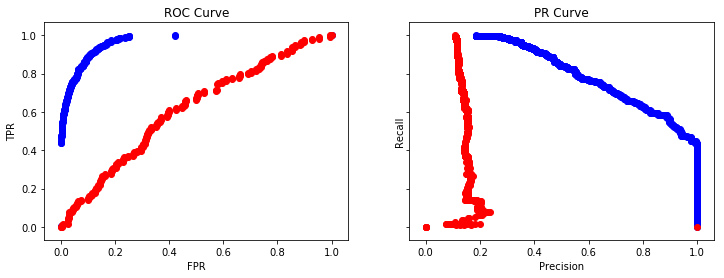

----- gamma = 0.005000 -----
Time elapsed (Training): 105.7621 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.865403
ROCAUC Score (Validation): 0.587951
PRAUC Score (Validation): 0.101123
Time elapsed (Evaluation): 35.4373 s


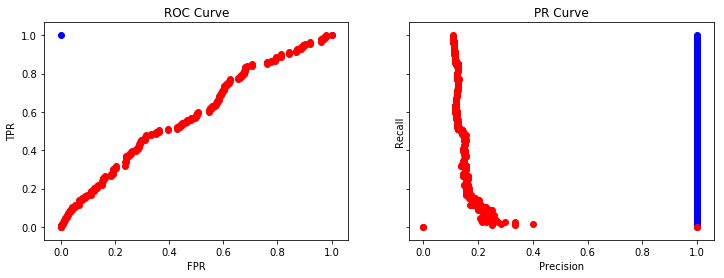

----- gamma = 0.010000 -----
Time elapsed (Training): 105.9253 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.865403
ROCAUC Score (Validation): 0.587847
PRAUC Score (Validation): 0.101278
Time elapsed (Evaluation): 35.3201 s


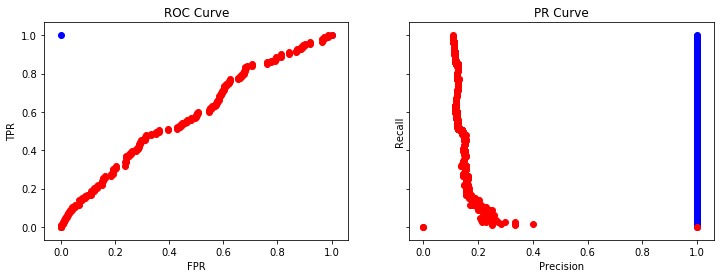

----- gamma = 0.050000 -----
Time elapsed (Training): 104.2228 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.865403
ROCAUC Score (Validation): 0.587913
PRAUC Score (Validation): 0.101127
Time elapsed (Evaluation): 35.4382 s


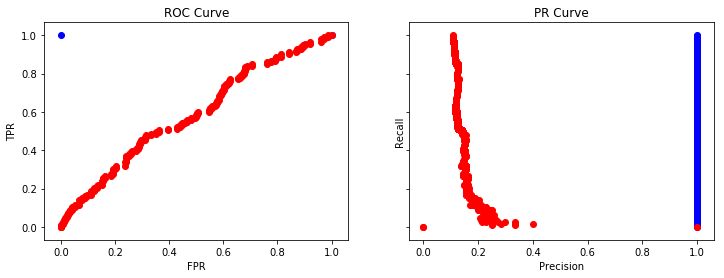

----- gamma = 0.100000 -----
Time elapsed (Training): 100.8161 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.865403
ROCAUC Score (Validation): 0.587913
PRAUC Score (Validation): 0.101127
Time elapsed (Evaluation): 35.5000 s


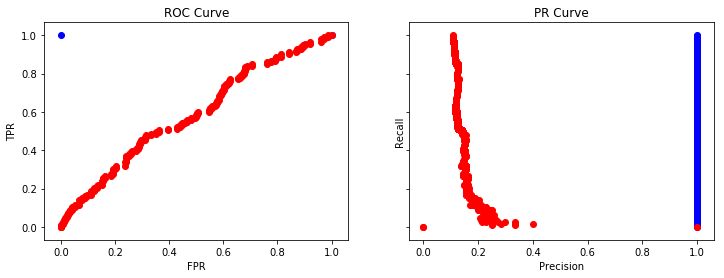

In [12]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- gamma = %f -----' % k)
    clf = svm.SVC(probability=True, class_weight=class_weight, kernel='poly', degree=3, gamma=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

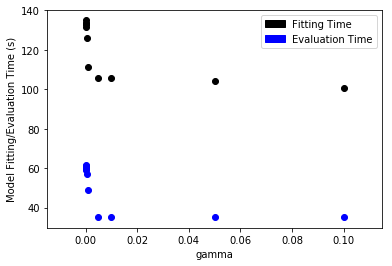

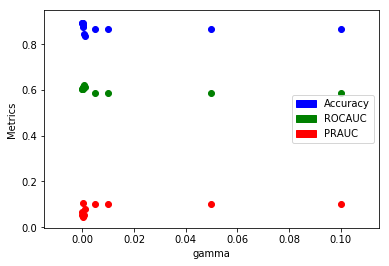

    0_gamma  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0   0.00001    0.891943  0.604832  0.065479  131.813395    61.609173
1   0.00002    0.891943  0.605133  0.052081  133.797140    59.430997
2   0.00005    0.891943  0.605960  0.048707  133.162858    60.484736
3   0.00010    0.886256  0.609661  0.045328  135.013638    61.187283
4   0.00020    0.876777  0.615270  0.105769  133.308306    59.170461
5   0.00050    0.843602  0.622720  0.054080  126.218105    56.828066
6   0.00100    0.837915  0.611756  0.078144  111.278857    49.190178
7   0.00500    0.865403  0.587951  0.101123  105.762128    35.437321
8   0.01000    0.865403  0.587847  0.101278  105.925258    35.320055
9   0.05000    0.865403  0.587913  0.101127  104.222761    35.438183
10  0.10000    0.865403  0.587913  0.101127  100.816058    35.499958


         0_gamma  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  11.000000   11.000000  11.000000  11.000000   11.000000    11.000000
mean    0.015171  

In [13]:
utils.plot_metrics(ks, 'gamma', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

With polynomial degree 3, the best ROCAUC obtained is 0.623, better than that of degree 2.

----- gamma = 0.000010 -----
Time elapsed (Training): 137.1093 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=1e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.652591
PRAUC Score (Training): 0.060167
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.529555
PRAUC Score (Validation): 0.047757
Time elapsed (Evaluation): 61.3291 s


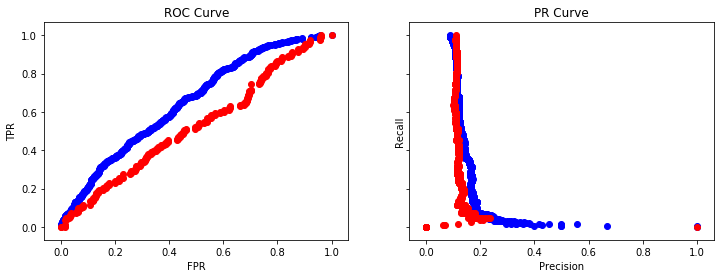

----- gamma = 0.000020 -----
Time elapsed (Training): 136.7818 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=2e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.317550
PRAUC Score (Training): 0.485470
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.453103
PRAUC Score (Validation): 0.462416
Time elapsed (Evaluation): 61.2343 s


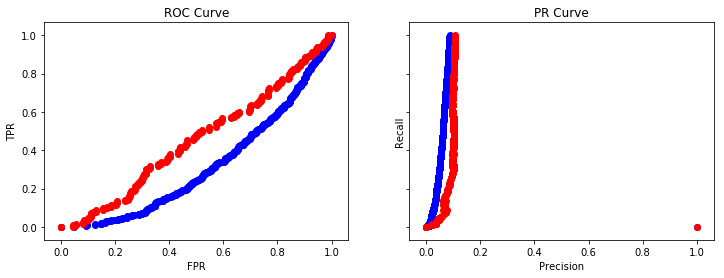

----- gamma = 0.000050 -----
Time elapsed (Training): 138.9304 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=5e-05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.691249
PRAUC Score (Training): 0.078111
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.550551
PRAUC Score (Validation): 0.033179
Time elapsed (Evaluation): 61.6705 s


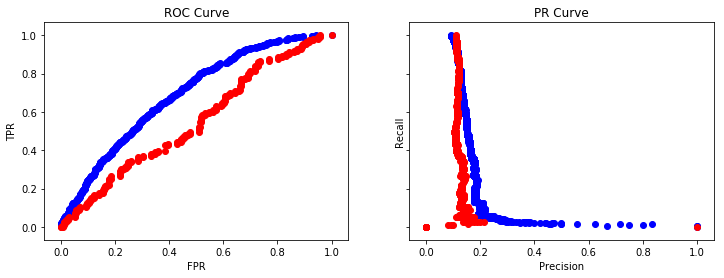

----- gamma = 0.000100 -----
Time elapsed (Training): 139.5876 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.0001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.701911
PRAUC Score (Training): 0.082072
Accuracy (Validation): 0.891943
ROCAUC Score (Validation): 0.562708
PRAUC Score (Validation): 0.037783
Time elapsed (Evaluation): 62.1405 s


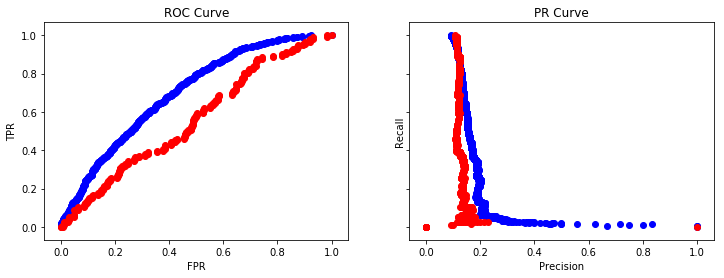

----- gamma = 0.000200 -----
Time elapsed (Training): 138.7291 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.0002, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.913250
ROCAUC Score (Training): 0.741652
PRAUC Score (Training): 0.112186
Accuracy (Validation): 0.888152
ROCAUC Score (Validation): 0.577692
PRAUC Score (Validation): 0.092079
Time elapsed (Evaluation): 62.1408 s


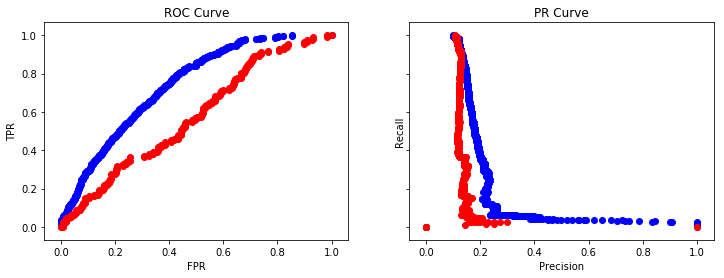

----- gamma = 0.000500 -----
Time elapsed (Training): 133.6024 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.0005, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.926049
ROCAUC Score (Training): 0.843175
PRAUC Score (Training): 0.354288
Accuracy (Validation): 0.875829
ROCAUC Score (Validation): 0.577523
PRAUC Score (Validation): 0.064131
Time elapsed (Evaluation): 59.9544 s


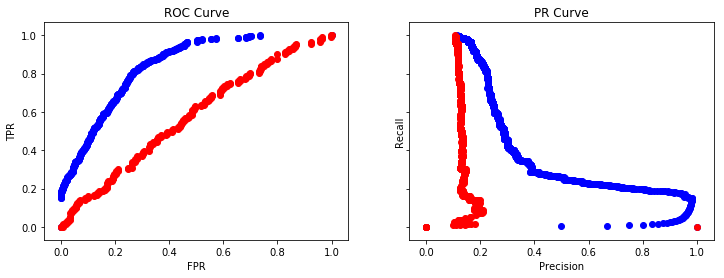

----- gamma = 0.001000 -----
Time elapsed (Training): 121.8570 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.001, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 0.952358
ROCAUC Score (Training): 0.035594
PRAUC Score (Training): 0.498194
Accuracy (Validation): 0.867299
ROCAUC Score (Validation): 0.402815
PRAUC Score (Validation): 0.028930
Time elapsed (Evaluation): 54.6572 s


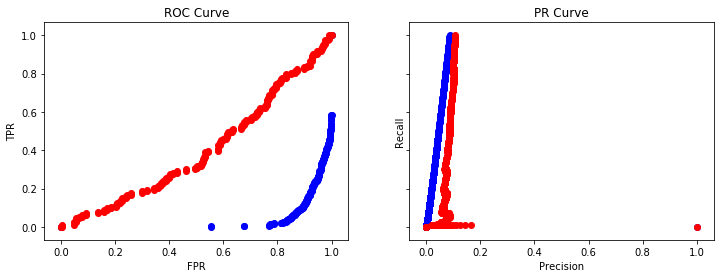

----- gamma = 0.005000 -----
Time elapsed (Training): 116.1130 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.005, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.862559
ROCAUC Score (Validation): 0.555484
PRAUC Score (Validation): 0.090223
Time elapsed (Evaluation): 41.5940 s


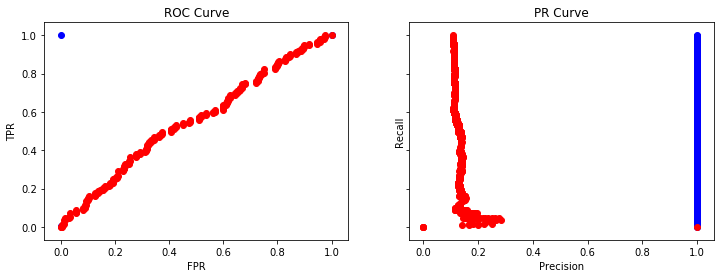

----- gamma = 0.010000 -----
Time elapsed (Training): 122.2432 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.01, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.862559
ROCAUC Score (Validation): 0.555512
PRAUC Score (Validation): 0.090193
Time elapsed (Evaluation): 41.7496 s


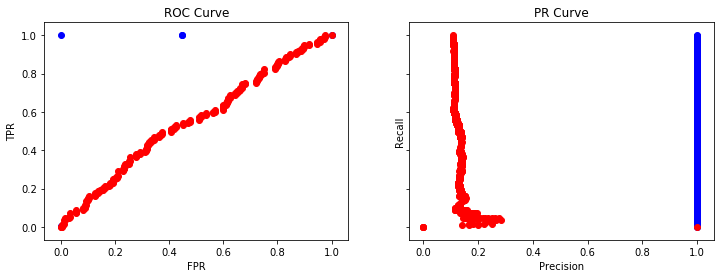

----- gamma = 0.050000 -----
Time elapsed (Training): 117.1116 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.05, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.862559
ROCAUC Score (Validation): 0.555493
PRAUC Score (Validation): 0.090221
Time elapsed (Evaluation): 41.6412 s


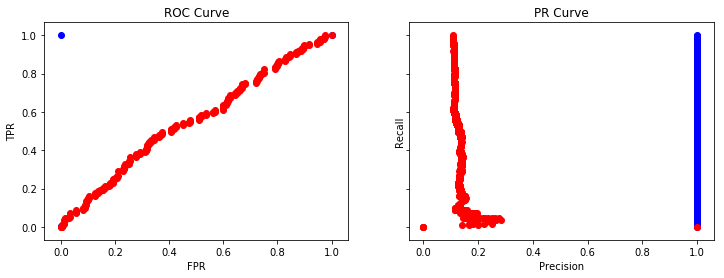

----- gamma = 0.100000 -----
Time elapsed (Training): 124.7369 s
SVC(C=1.0, cache_size=200, class_weight={0: 1.0, 1: 10.0}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy (Training): 1.000000
ROCAUC Score (Training): 0.000000
PRAUC Score (Training): 0.498681
Accuracy (Validation): 0.862559
ROCAUC Score (Validation): 0.444507
PRAUC Score (Validation): 0.461461
Time elapsed (Evaluation): 41.6560 s


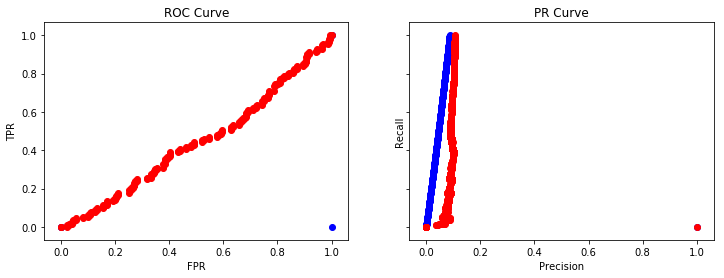

In [14]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- gamma = %f -----' % k)
    clf = svm.SVC(probability=True, class_weight=class_weight, kernel='poly', degree=4, gamma=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

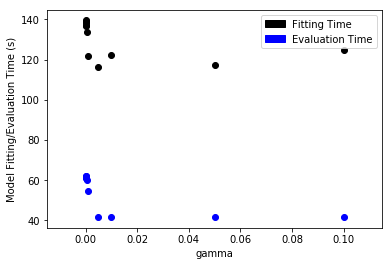

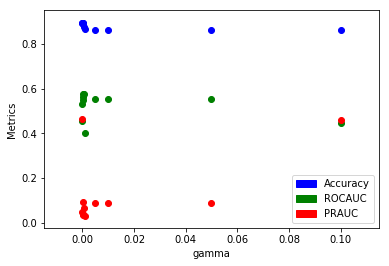

    0_gamma  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0   0.00001    0.891943  0.529555  0.047757  137.109300    61.329117
1   0.00002    0.891943  0.453103  0.462416  136.781844    61.234276
2   0.00005    0.891943  0.550551  0.033179  138.930428    61.670487
3   0.00010    0.891943  0.562708  0.037783  139.587630    62.140455
4   0.00020    0.888152  0.577692  0.092079  138.729089    62.140803
5   0.00050    0.875829  0.577523  0.064131  133.602408    59.954379
6   0.00100    0.867299  0.402815  0.028930  121.856950    54.657180
7   0.00500    0.862559  0.555484  0.090223  116.113015    41.594020
8   0.01000    0.862559  0.555512  0.090193  122.243167    41.749560
9   0.05000    0.862559  0.555493  0.090221  117.111552    41.641244
10  0.10000    0.862559  0.444507  0.461461  124.736864    41.656038


         0_gamma  1_Accuracy   2_ROCAUC    3_PRAUC  4_fit_time  5_eval_time
count  11.000000   11.000000  11.000000  11.000000   11.000000    11.000000
mean    0.015171  

In [15]:
utils.plot_metrics(ks, 'gamma', True, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

With polynomial degree 3, the best ROCAUC dropped to 0.578, even worse than the linear kernel.

## Sigmoid Kernel

Finally, I will try the sigmoid kernel.

In [ ]:
# Train and evaluate the model

clf = svm.SVC(probability=True, class_weight=class_weight, kernel='sigmoid') # Set probability=True to enable the predict_proba() API
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- gamma = %f -----' % k)
    clf = svm.SVC(probability=True, class_weight=class_weight, kernel='sigmoid', gamma=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)